<CENTER><H1>SUPERMART GROCERY SALES ANALYSIS</H1></CENTER>

In [7]:
# Import the librieres
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load the dataset
df= pd.read_csv(r"Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Perform basic steps to understand the dataset

In [9]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [10]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [11]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

# Check for not null count and data types for each column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


#####   Here we can see the data type of "Order Date" is represented as object. So convert it into date type.

# Converting the data type of "Order date" into date type

In [13]:
df["Order Date"] = pd.to_datetime(df["Order Date"],format="mixed")

# Extracting Month Name and Year from Order date

In [14]:
df["month"] = pd.to_datetime(df['Order Date']).dt.strftime("%b")

In [15]:
df["Year"] = pd.to_datetime(df['Order Date']).dt.year

In [16]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,Nov,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,Nov,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,Jun,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,Oct,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,Oct,2016


# Cleaning the dataset

# Handling null values

In [17]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
month            0
Year             0
dtype: int64

###### We can see there are no null values in the dataset it is a clean dataset.

# Removing Duplicates

In [18]:
df.duplicated().sum()

0

##### There are no duplicates in the dataset.

# Exploratory Data Analysis

# Descriptive Statistics

In [19]:
df.describe(include=["int","float"])

,Sales,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082,2016.722233
std,577.559036,0.074636,239.932881,1.123555
min,500.000000,0.100000,25.250000,2015.000000
25%,1000.000000,0.160000,180.022500,2016.000000
50%,1498.000000,0.230000,320.780000,2017.000000
75%,1994.750000,0.290000,525.627500,2018.000000
max,2500.000000,0.350000,1120.950000,2018.000000


##### Observations:                                                                                                                                            
##### 1)Sales are varying from 2500 to 500 with an average of 1500.                                                                                            
##### 2)Profit is varying from 1120 to 25 with an average of 375.

In [20]:
df.describe(include = "O")

,Order ID,Customer Name,Category,Sub Category,City,Region,State,month
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,50,7,23,24,5,1,12
top,OD1,Amrish,Snacks,Health Drinks,Kanyakumari,West,Tamil Nadu,Nov
freq,1,227,1514,719,459,3203,9994,1471


##### Observations:                                                                                                                                            
##### 1)There are 7 types of unique Categories and 23 types of Sub Categories.                                                                                 
##### 2)This data is from 24 different Cities of same state Tamil Nadu.

# Univariate Analysis

In [21]:
df["City"].value_counts()

City
Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: count, dtype: int64

C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\1070416552.py:3: UserWarning: 
The palette list has fewer values (9) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,x="City",hue="City",order=x.index,palette=sns.color_palette('Set1'))


Text(0, 0.5, 'count')

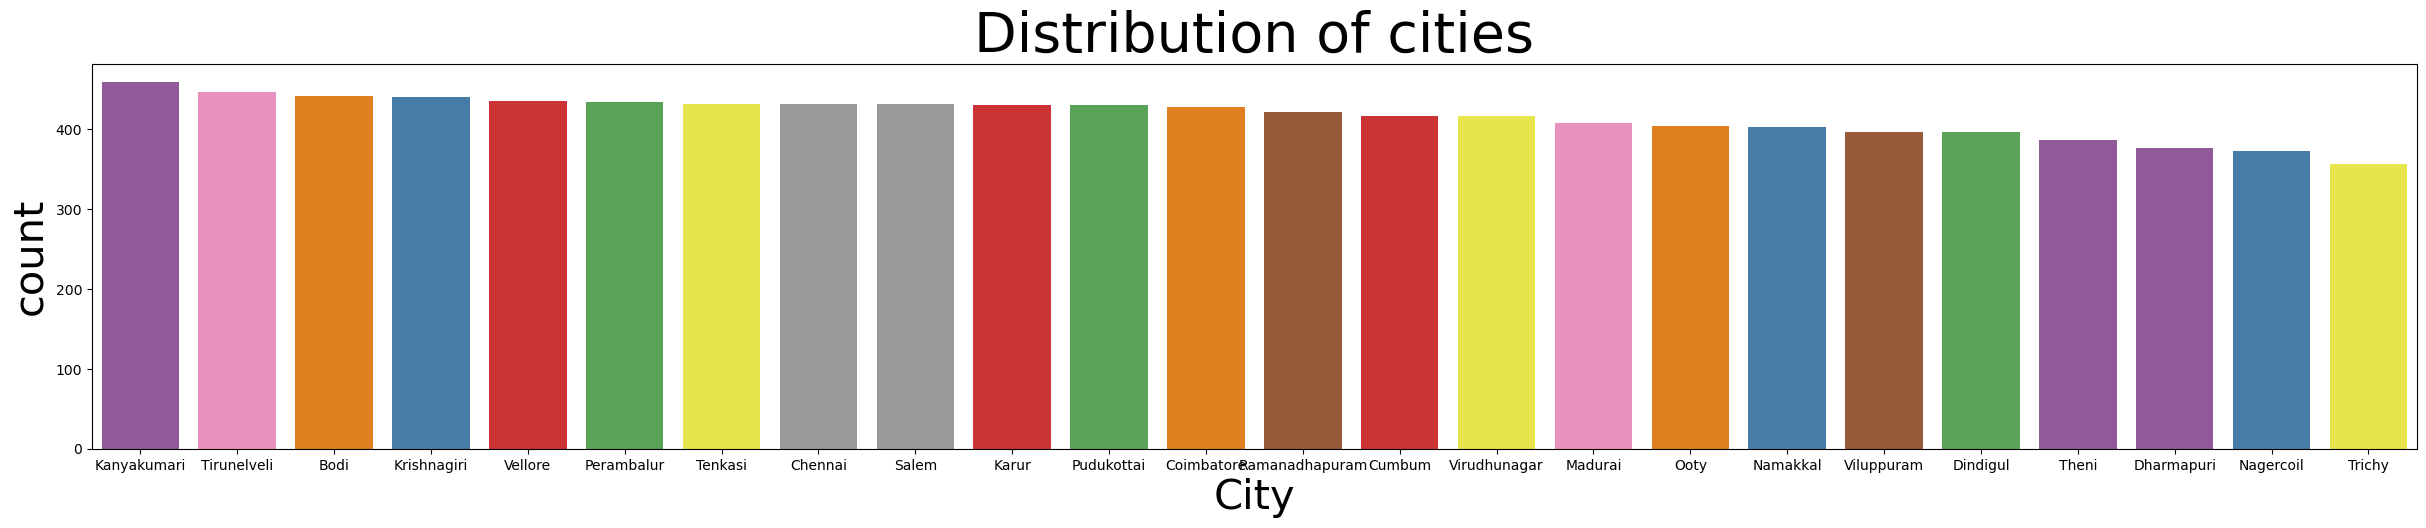

In [22]:
plt.figure(figsize=(30,5))
x=df["City"].value_counts()
sns.countplot(data=df,x="City",hue="City",order=x.index,palette=sns.color_palette('Set1'))
plt.title("Distribution of cities",fontsize=40)
plt.xlabel("City",fontsize=30)
plt.ylabel("count",fontsize=30)

##### It shows most of the customers are from "Kanyakumari" followed by "Tirunelveli" and "Bodi".

In [23]:
df["Discount"].value_counts()

Discount
0.25    438
0.27    422
0.19    415
0.35    413
0.34    409
0.26    404
0.21    402
0.22    393
0.23    392
0.18    392
0.33    389
0.24    387
0.16    386
0.14    381
0.30    378
0.32    376
0.12    375
0.28    374
0.11    372
0.15    371
0.31    369
0.29    366
0.10    366
0.20    346
0.13    342
0.17    336
Name: count, dtype: int64

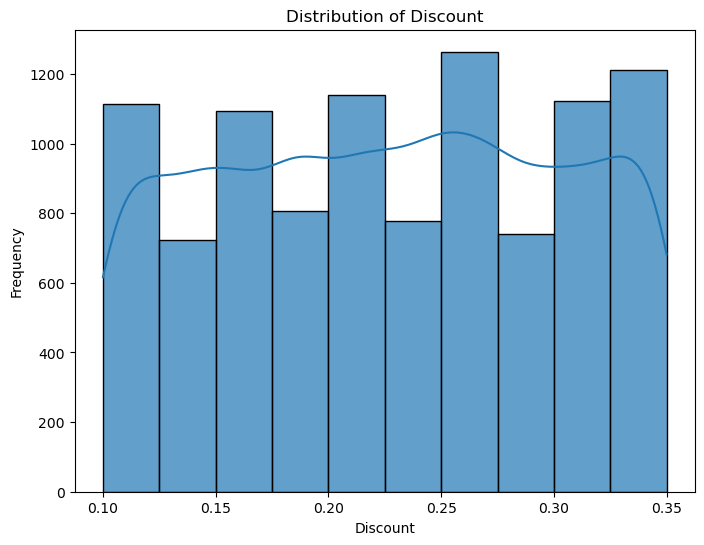

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Discount'],kde=True, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

##### Observations:                                                                                                                                            
##### 1)The discounts range from 0.10 to 0.35.                                                                                                                 
##### 2)0.25 to 0.27 have the highest counts indicating people are preferring discounts in this range.                                                       

In [25]:
df["Category"].value_counts()

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\2844954173.py:3: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.countplot(data=df,x="Category",hue="Category",order=x.index,palette=sns.color_palette('Set1'))


Text(0, 0.5, 'count')

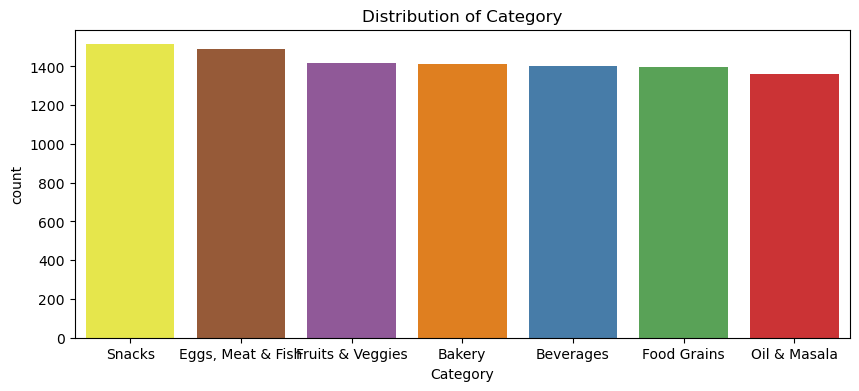

In [26]:
plt.figure(figsize=(10,4))
x=df["Category"].value_counts()
sns.countplot(data=df,x="Category",hue="Category",order=x.index,palette=sns.color_palette('Set1'))
plt.title("Distribution of Category")
plt.xlabel("Category")
plt.ylabel("count")

##### It shows Consumers are showing a strong preference for 'Snacks' and 'Eggs, Meat & Fish'.

In [27]:
df["Sub Category"].value_counts()

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\2806836979.py:3: UserWarning: 
The palette list has fewer values (9) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,x="Sub Category",hue="Sub Category",order=x.index,palette=sns.color_palette('Set1'))


Text(0, 0.5, 'count')

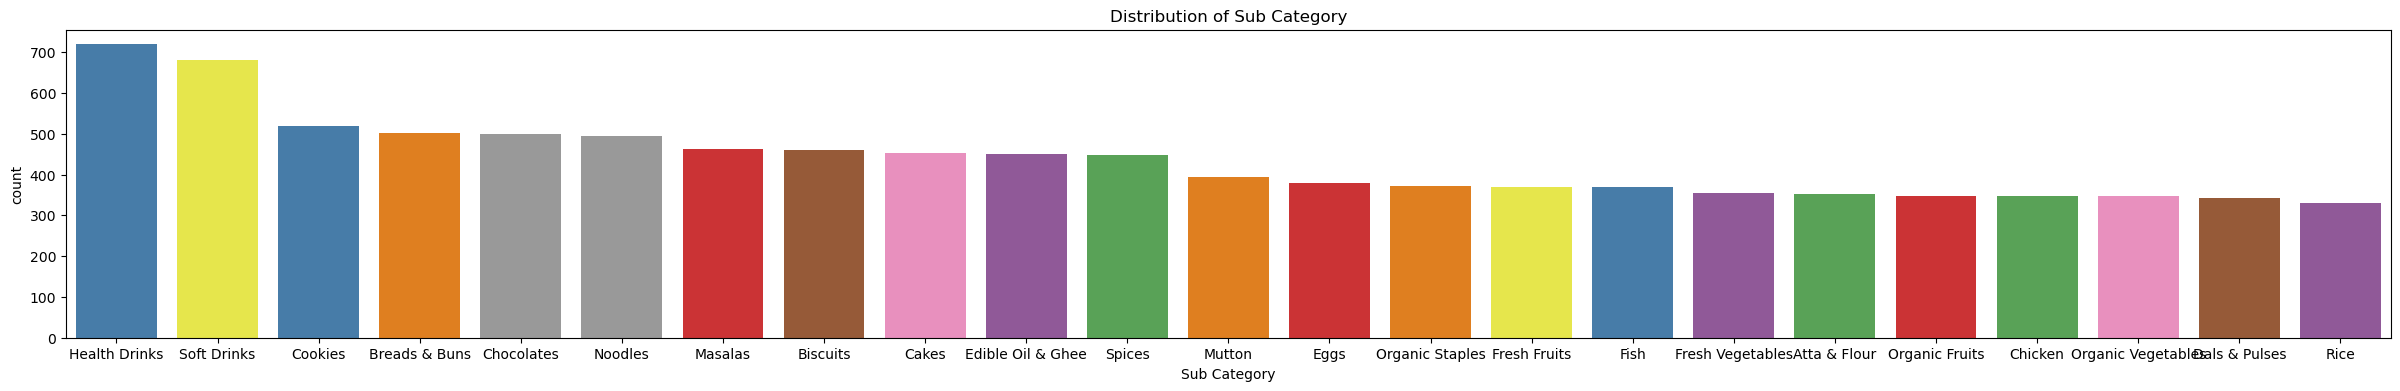

In [28]:
plt.figure(figsize=(30,4))
x=df["Sub Category"].value_counts()
sns.countplot(data=df,x="Sub Category",hue="Sub Category",order=x.index,palette=sns.color_palette('Set1'))
plt.title("Distribution of Sub Category")
plt.xlabel("Sub Category")
plt.ylabel("count")

##### There is a noticeable preference for 'Health Drinks' and 'Soft Drinks' among consumers.

In [29]:
df["month"].value_counts()

month
Nov    1471
Dec    1408
Sep    1383
Oct     819
May     735
Jun     717
Jul     710
Aug     706
Mar     696
Apr     668
Jan     381
Feb     300
Name: count, dtype: int64

C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\89481484.py:3: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df,x="month",hue="month",order=x.index,palette=sns.color_palette('Set1'))


Text(0, 0.5, 'count')

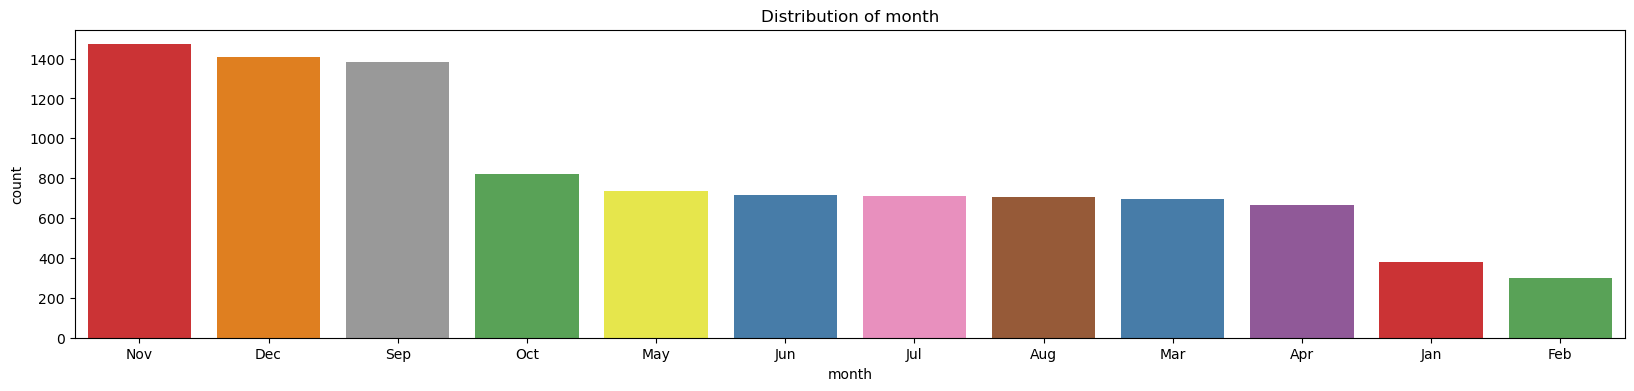

In [30]:
plt.figure(figsize=(20,4))
x=df["month"].value_counts()
sns.countplot(data=df,x="month",hue="month",order=x.index,palette=sns.color_palette('Set1'))
plt.title("Distribution of month")
plt.xlabel("month")
plt.ylabel("count")

##### Most of the Sales are in the months of November,December and September.

In [31]:
df["Year"].value_counts()

Year
2018    3312
2017    2587
2016    2102
2015    1993
Name: count, dtype: int64

C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\1462657859.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax=sns.countplot(data=df,x="Year",hue="Year",order=x.index,palette=sns.color_palette('Set1'))


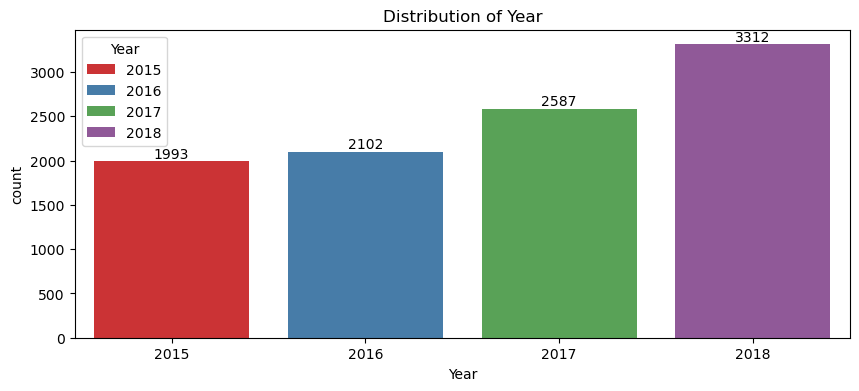

In [32]:
plt.figure(figsize=(10,4))
x=df["Year"].value_counts()[::-1]
ax=sns.countplot(data=df,x="Year",hue="Year",order=x.index,palette=sns.color_palette('Set1'))
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("count")
for bars in ax.containers:
    ax.bar_label(bars)
    

##### Sales are gradually increasing over the years.

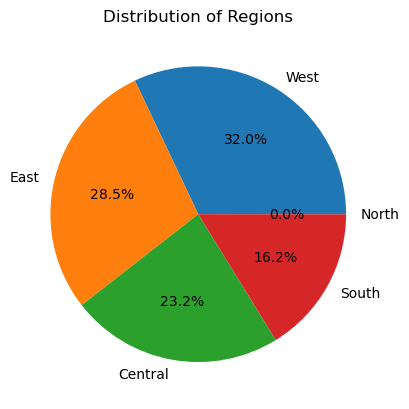

In [33]:
x=df["Region"].value_counts() 
plt.pie(x,labels=x.index,autopct="%1.1f%%")
plt.title("Distribution of Regions")
plt.show()

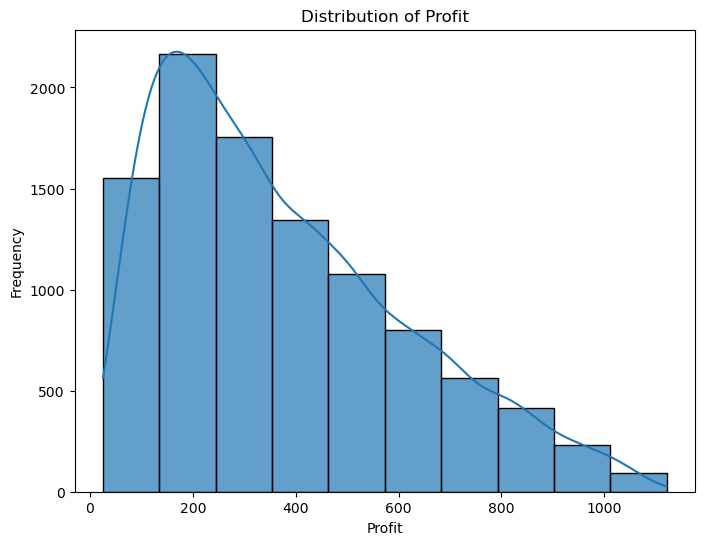

In [34]:
# Histogram for Profit
plt.figure(figsize=(8, 6))
sns.histplot(df['Profit'],kde=True, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

##### The peak at 200 suggests that a significant number of instances are clustered around this profit level.

# Bi Variant analysis

In [35]:
category= df.groupby(["Category"],as_index=False)["Sales"].sum().sort_values(by='Sales',ascending=False)
category

,Category,Sales
2,"Eggs, Meat & Fish",2267401
6,Snacks,2237546
3,Food Grains,2115272
0,Bakery,2112281
4,Fruits & Veggies,2100727
1,Beverages,2085313
5,Oil & Masala,2038442


C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\1619840392.py:2: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.barplot(x='Category', y='Sales', data=category, hue='Category',palette=sns.color_palette('Set1'),legend = False )


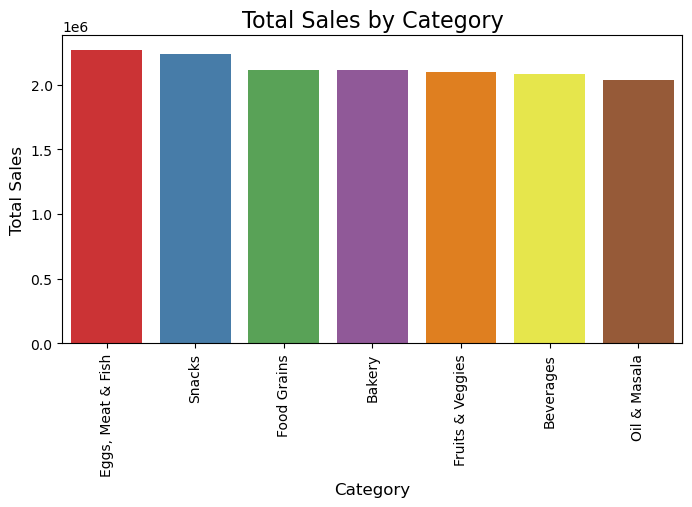

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Category', y='Sales', data=category, hue='Category',palette=sns.color_palette('Set1'),legend = False )
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### There is not much variation in sales across categories, but 'Eggs, Meat & Fish' and 'Snacks' consistently top the list.

In [37]:
Sub_Category= df.groupby(["Sub Category"],as_index=False)["Sales"].sum().sort_values(by='Sales',ascending=False)
Sub_Category

,Sub Category,Sales
13,Health Drinks,1051439
21,Soft Drinks,1033874
6,Cookies,768213
2,Breads & Buns,742586
16,Noodles,735435
5,Chocolates,733898
14,Masalas,697480
3,Cakes,685612
1,Biscuits,684083
22,Spices,672876


C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\2558534300.py:2: UserWarning: 
The palette list has fewer values (9) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Sub Category', y='Sales', data=Sub_Category,hue='Sales', palette=sns.color_palette('Set1'))


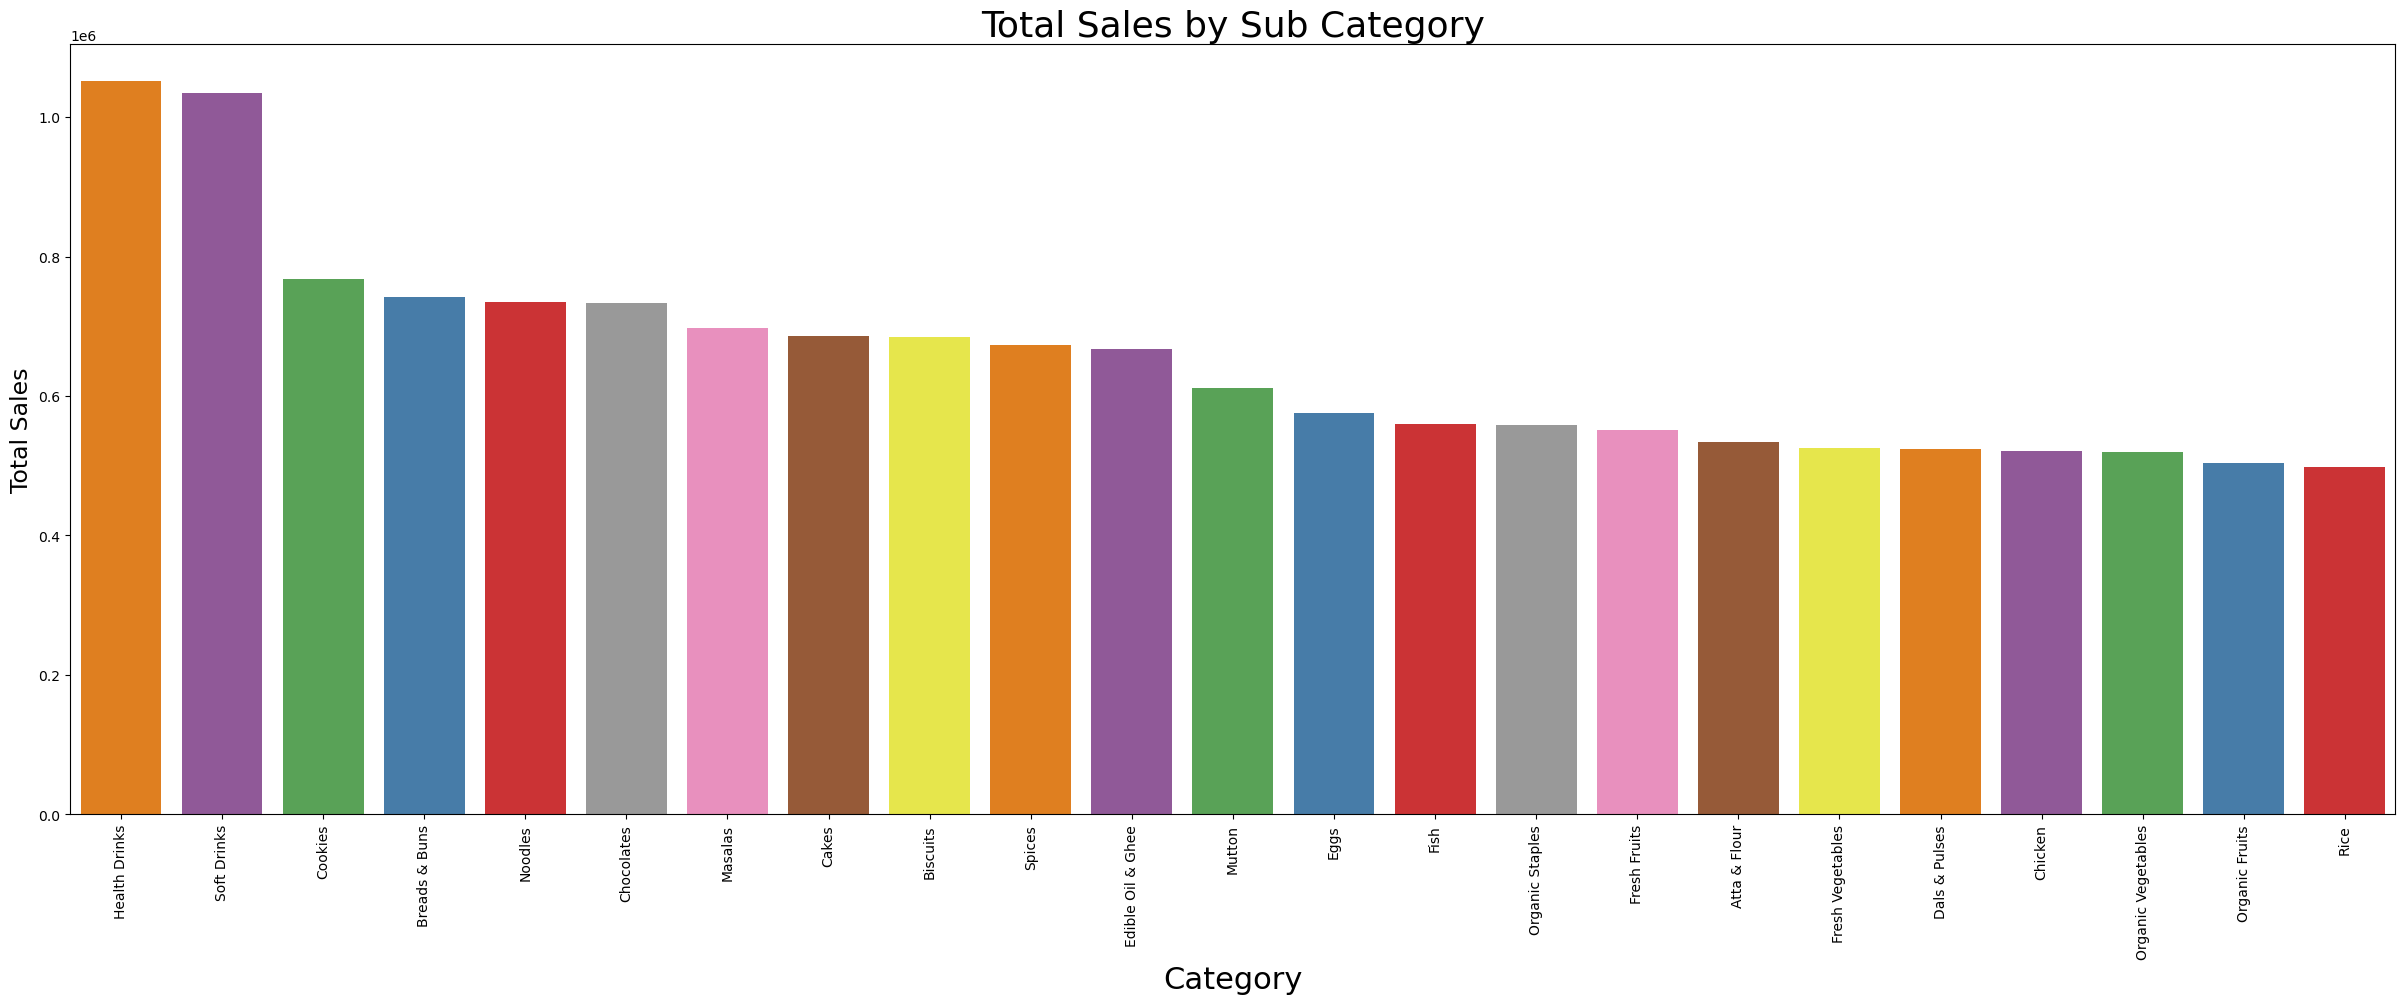

In [38]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Sub Category', y='Sales', data=Sub_Category,hue='Sales', palette=sns.color_palette('Set1'))
plt.title('Total Sales by Sub Category', fontsize=26)
plt.xlabel('Category', fontsize=22)
plt.ylabel('Total Sales', fontsize=17)
plt.xticks(rotation=90)
plt.legend([], frameon=False)
plt.show()

##### Health drinks and soft drinks are the top-selling categories .

In [39]:
city= df.groupby(["City"],as_index=False)["Sales"].sum().sort_values(by='Sales',ascending = False )
city

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738
16,Salem,657093
14,Pudukottai,653179
17,Tenkasi,643652
7,Karur,642273
8,Krishnagiri,637273


C:\Users\Manjula\AppData\Local\Temp\ipykernel_9156\1431346909.py:2: UserWarning: 
The palette list has fewer values (9) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='City', y='Sales', data=city,hue='Sales', palette=sns.color_palette('Set1'))


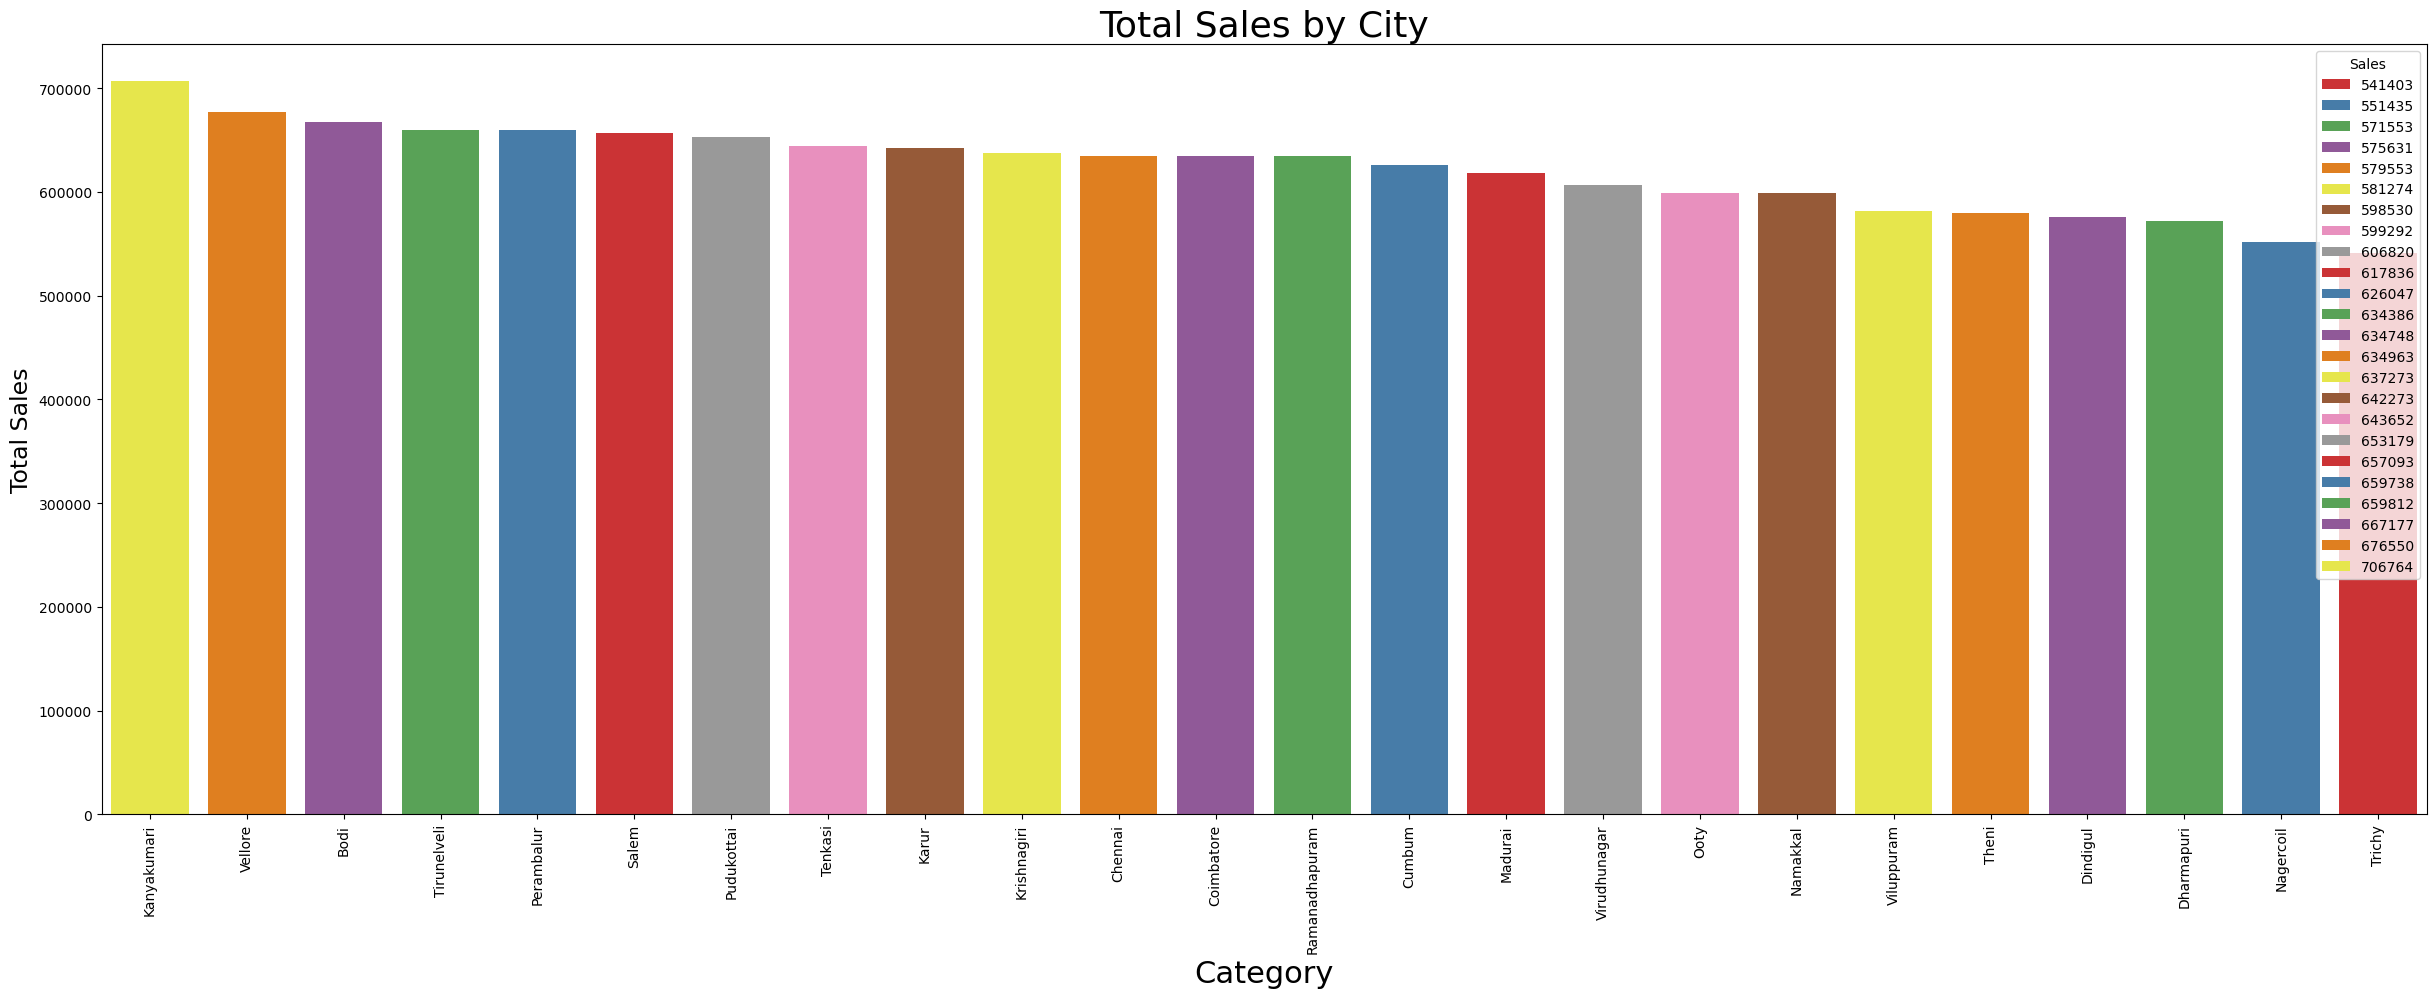

In [40]:
plt.figure(figsize=(30, 10))
sns.barplot(x='City', y='Sales', data=city,hue='Sales', palette=sns.color_palette('Set1'))
plt.title('Total Sales by City', fontsize=26)
plt.xlabel('Category', fontsize=22)
plt.ylabel('Total Sales', fontsize=17)
plt.xticks(rotation=90)
plt.show()

##### It shows most of the Sales are from "Kanyakumari" followed by "Vellore" and "Bodi".

In [41]:
yearly=df.groupby("Year")["Sales"].sum().sort_values(ascending=False)[::-1]
yearly

Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64

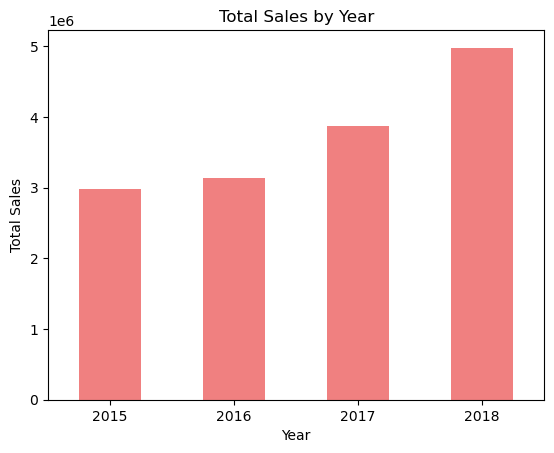

In [42]:
yearly.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

##### Sales are increasing gradually over the years.

In [43]:
monthly= df.groupby("month")["Sales"].sum().sort_values(ascending=False)
monthly

month
Nov    2193924
Dec    2088076
Sep    2064266
Oct    1243289
Jul    1089385
May    1086920
Jun    1057808
Mar    1053980
Aug    1046807
Apr     998453
Jan     577972
Feb     456102
Name: Sales, dtype: int64

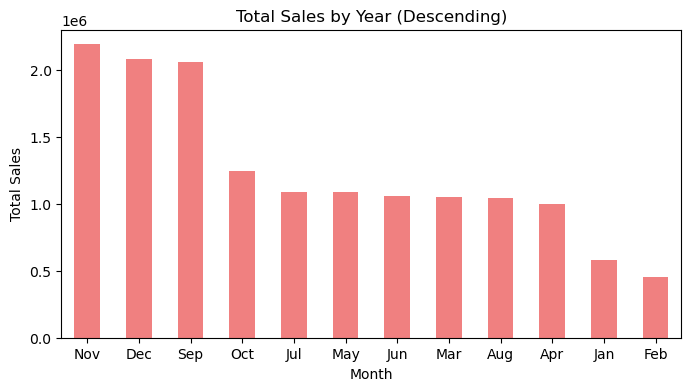

In [44]:
plt.figure(figsize=(8,4))
monthly.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by Year (Descending)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

##### Sales are more in the months of "November","December" and "September".

In [45]:
region = df.groupby(["Region"])["Sales"].sum().sort_values(ascending = False)
print(region)

Region
West       4798743
East       4248368
Central    3468156
South      2440461
North         1254
Name: Sales, dtype: int64


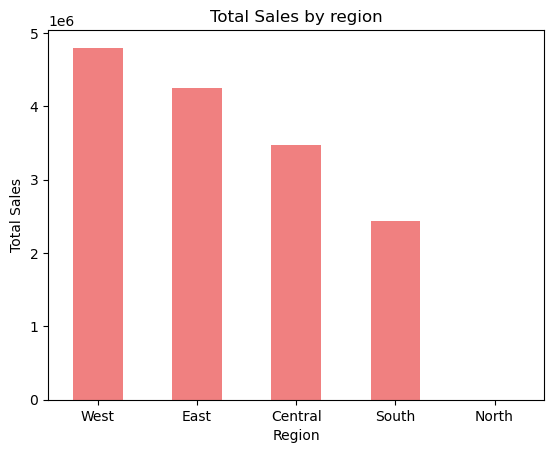

In [46]:
region.plot(kind='bar', color='lightcoral')

plt.title('Total Sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()

##### People staying in the west region are creating more sales.

In [47]:
df["Sales"].corr(df["Discount"])

-0.005512487630014779

##### The correlation is close to zero indicates a very weak negative correlation,suggesting that there is virtually no linear relationship between sales and discounts.Changes in discount levels do not significantly impact sales.

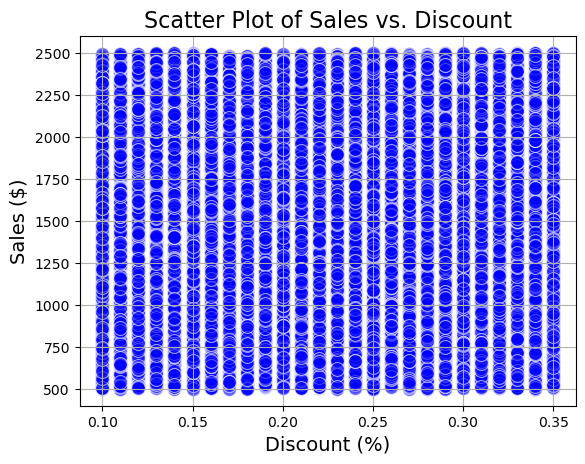

In [48]:
sns.scatterplot(x='Discount', y='Sales', data=df, color='blue', s=100, alpha=0.6, edgecolor='w')
plt.title('Scatter Plot of Sales vs. Discount', fontsize=16)
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.grid(True)
plt.show()

In [49]:
df["Sales"].corr(df["Profit"])

0.6053485582321635

##### Indicates a moderate positive correlation between profit and sales.                                                                                      
##### The positive correlation suggests that, generally, as sales increase, profit tends to increase as well. 

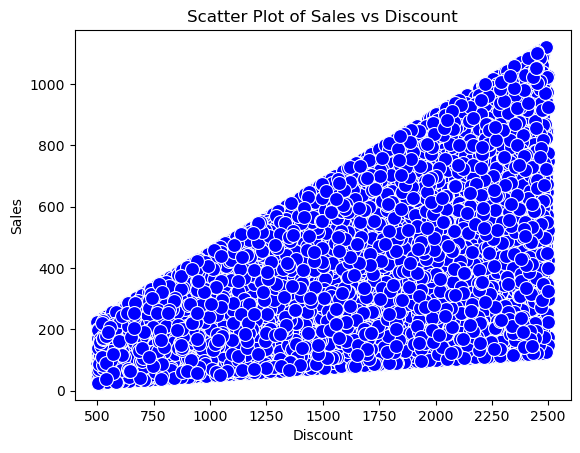

In [50]:
sns.scatterplot(x='Sales', y='Profit', data=df, color='blue', s=100)


plt.title('Scatter Plot of Sales vs Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')


plt.show()

In [51]:
correlation_df=df[['Sales','Profit','Discount']]
correlation_matrix=correlation_df.corr()
correlation_matrix

,Sales,Profit,Discount
Sales,1.000000,0.605349,-0.005512
Profit,0.605349,1.000000,0.000017
Discount,-0.005512,0.000017,1.000000


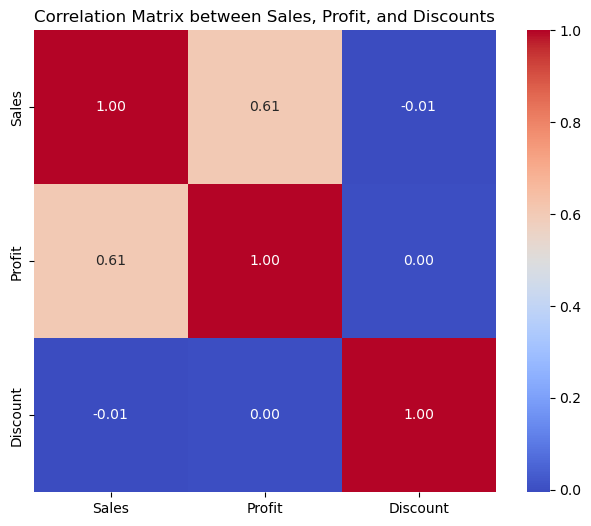

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix between Sales, Profit, and Discounts')
plt.show()

# Insights

### The data reveals that Kanyakumari is the primary market for sales, followed by Tirunelveli and Bodi. Discounts ranging from 0.25 to 0.27 are most favored by consumers, who also show strong preferences for Snacks, Eggs, Meat & Fish, Health Drinks, and Soft Drinks. Sales peak in November, December, and September, with a noticeable upward trend over the years.

### While there is little variation in sales across categories, Eggs, Meat & Fish and Snacks lead consistently. Additionally, the correlation analysis indicates that changes in discount levels have a minimal impact on sales, as evidenced by a very weak negative correlation. Conversely, there is a moderate positive correlation between profit and sales, suggesting that as sales increase, profits tend to rise accordingly.